The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
pd.pandas.set_option('display.max_rows',None)

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

# Exploratory data analysis

We need to perform EDA to analyse the dataset for better understanding.

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
# Analyzing the shape of the dataset
df.shape

(158, 12)

In [5]:
#Analyzing features if having any null values present
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Observation

1. There are total of 12 columns/feature and 158 rows. 1 is dependent feature and 11 are independent features.
2. There are no null values observed in the dataset.
3. Both continuous and categorical data present in the dataset.
4. Out of 12 features 2 are categorical features and 10 are numerical features.
5. Since the dependent/target variable 'Happiness Score' is a continuous feature, hence will apply Linear regression model.

In [7]:
# Renaming columns for better readability

df.rename(columns={'Happiness Score':'Happiness_Score',
                   'Standard Error':'Standard_Error',
                   'Economy (GDP per Capita)':'GDP_per_Capita',
                   'Health (Life Expectancy)':'Life_Expectancy',
                   'Trust (Government Corruption)':'Govt_Corruption',
                   'Dystopia Residual':'Dystopia_Residual'},
         inplace=True)

Creating a list for Categorical and Numerical features 

In [8]:
num_feature=[feature for feature in df.columns if df[feature].dtype !='object' and feature not in 'Happiness Rank']
cat_feature=[feature for feature in df.columns if feature not in num_feature and feature not in 'Happiness Rank']

In [9]:
print('The numerical features are: ',num_feature,'\n')
print('The categorical features are: ',cat_feature)

The numerical features are:  ['Happiness_Score', 'Standard_Error', 'GDP_per_Capita', 'Family', 'Life_Expectancy', 'Freedom', 'Govt_Corruption', 'Generosity', 'Dystopia_Residual'] 

The categorical features are:  ['Country', 'Region']


In [10]:
df[num_feature].head(5)

,Happiness_Score,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Govt_Corruption,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [11]:
df[cat_feature].head(5)

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [12]:
# Checking the unique values of Region
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [13]:
# Checking the value_counts of Region
df['Region'].value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

Statistical overview of the Dataset

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness_Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard_Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
GDP_per_Capita,158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Life_Expectancy,158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Govt_Corruption,158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia_Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [15]:
df[num_feature].corr()

,Happiness_Score,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Govt_Corruption,Generosity,Dystopia_Residual
Happiness_Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard_Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
GDP_per_Capita,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Life_Expectancy,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Govt_Corruption,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia_Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Observation

1. There are slight skewness observed in few of the features. Need to investigate further for skewness. 
2. Presence of outliers can also be observed in some features such as Trust (Government Corruption), Freedom. Further analysis needed to established presence of outliers.
3. All the features shows the equal count. Hence no missing data.

Visualization of the dataset

Univariate analysis

In [16]:
df.head(3)

,Country,Region,Happiness Rank,Happiness_Score,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Govt_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


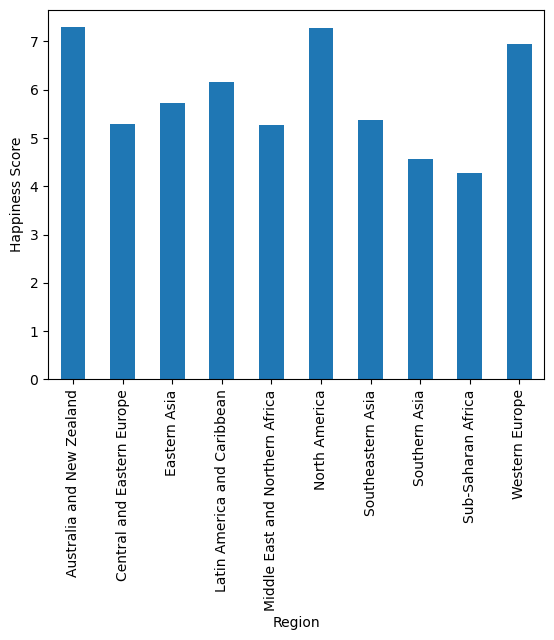

In [17]:
# Visualizing hapiness score based on regions

df.groupby('Region')['Happiness_Score'].median().plot.bar()
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

Observation

Regions like 'Australia and New Zealand', 'North America' and 'Western Europe' has high happiness score where as 'Southern Aisa', 'Sub-Saharan Africa' has the lowest hapiness score.

Visualizing 'Distribution of Features'

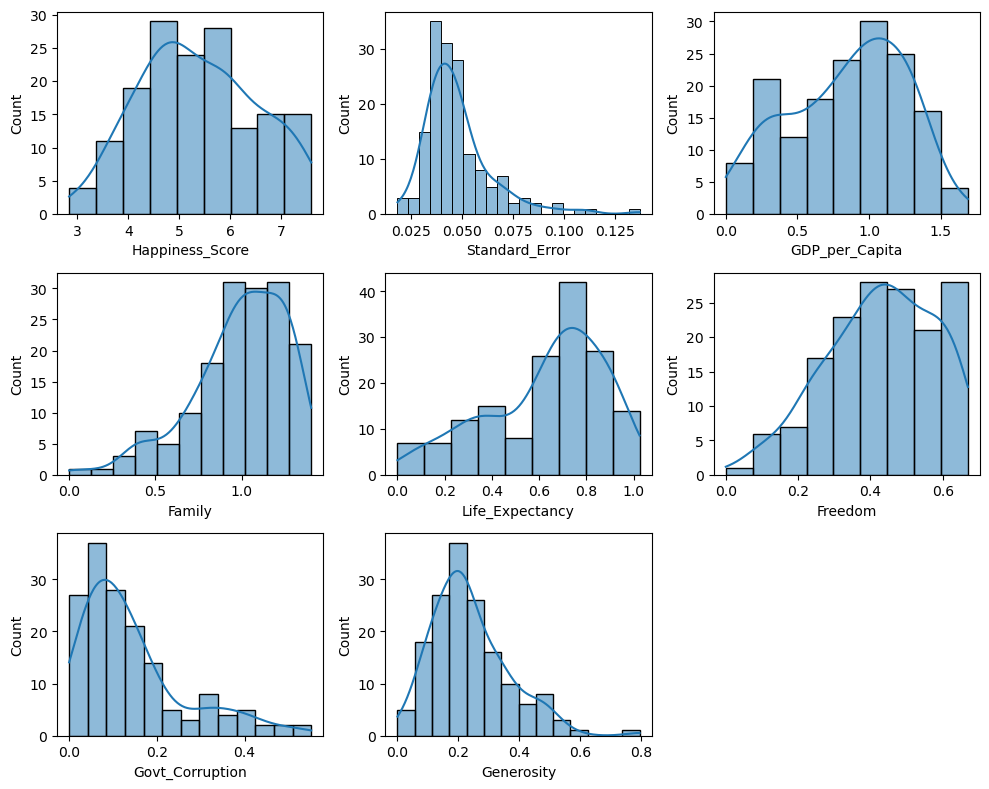

In [18]:
# Analysing distribution of numerical features 

plt.figure(figsize=(10,8))
index=1
for feature in num_feature:
    if index<len(num_feature):
        plt.subplot(3,3,index)
        sns.histplot(df[feature], kde=True)
        plt.xlabel(feature)
        plt.ylabel('Count')
        index=index+1
plt.tight_layout()

Observation

By observing the distribution plot, the features 'family','Health' are left skewed. Features like 'Standard Error', 'Trust (Government Corruption)','Generosity' are right skewed. Rest of the features almost looks normal. 

Bivariate Analysis

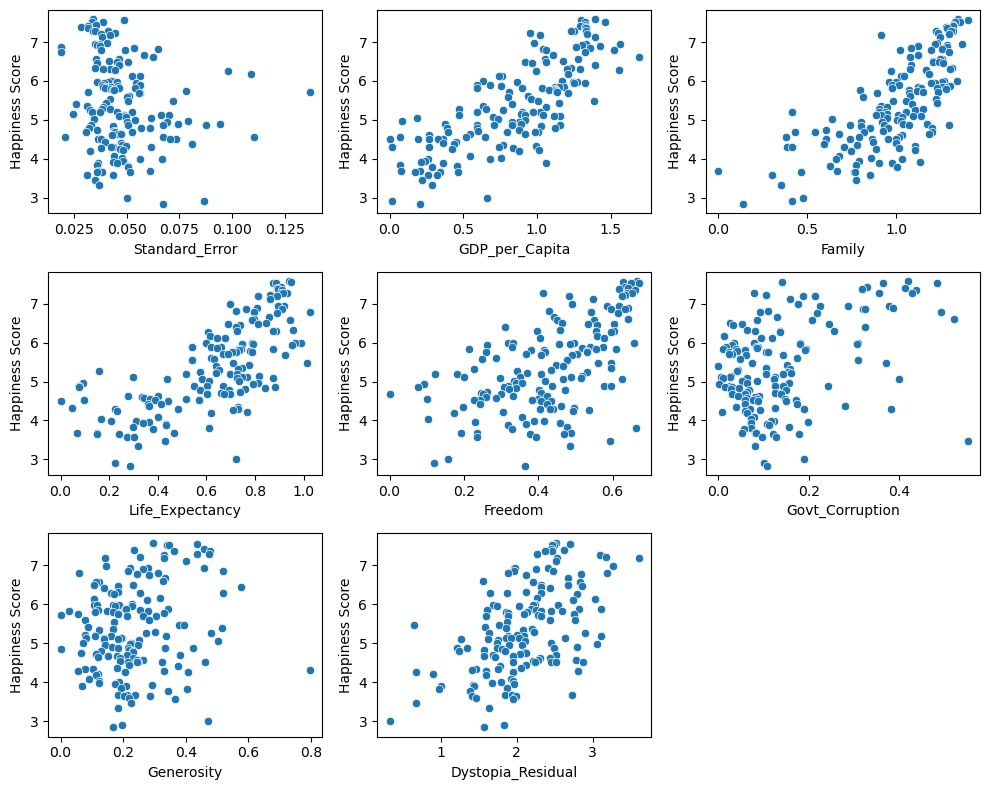

In [19]:
# Analyzing the relationship between happiness score and numerical features using scatter plot

plt.figure(figsize=(10,8))
index=1
for feature in num_feature:
    if feature not in ['Happiness_Score'] and index<9:
        plt.subplot(3,3,index)
        sns.scatterplot(x=df[feature],y=df['Happiness_Score'])
        plt.xlabel(feature)
        plt.ylabel('Happiness Score')
        index+=1
plt.tight_layout()    

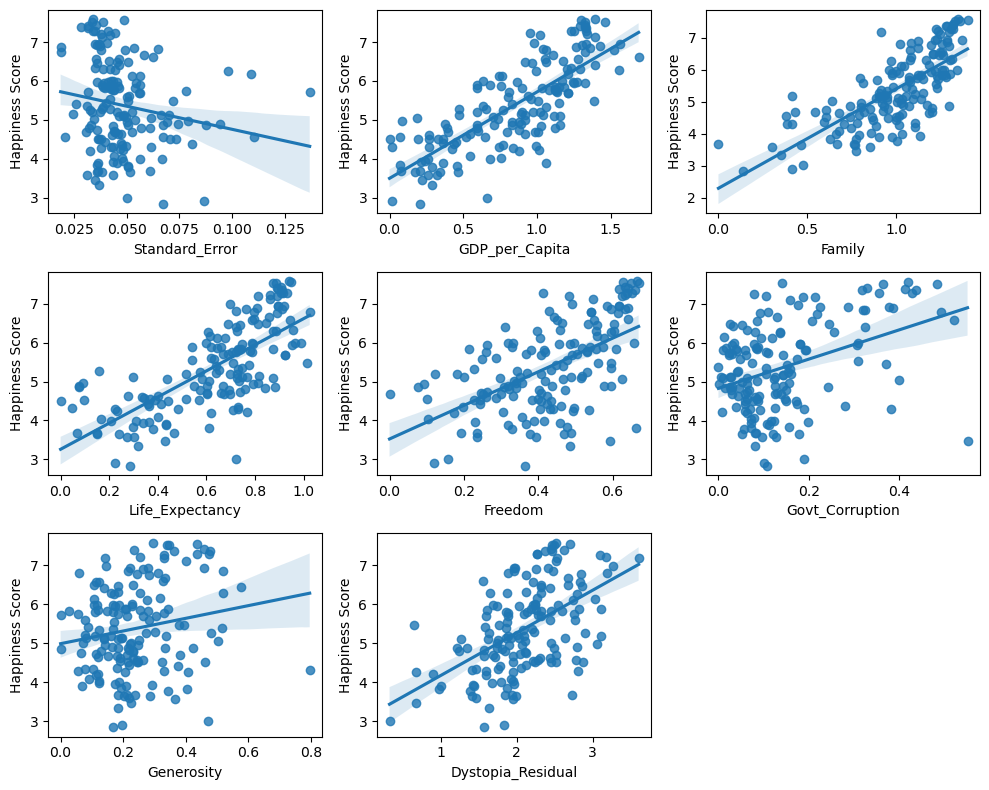

In [20]:
# Analyzing the relationship between happiness score and numerical features using regression plot

plt.figure(figsize=(10,8))
index=1
for feature in num_feature:
    if feature not in ['Happiness_Score'] and index<9:
        plt.subplot(3,3,index)
        sns.regplot(x=df[feature],y=df['Happiness_Score'])
        plt.xlabel(feature)
        plt.ylabel('Happiness Score')
        index+=1
plt.tight_layout()    

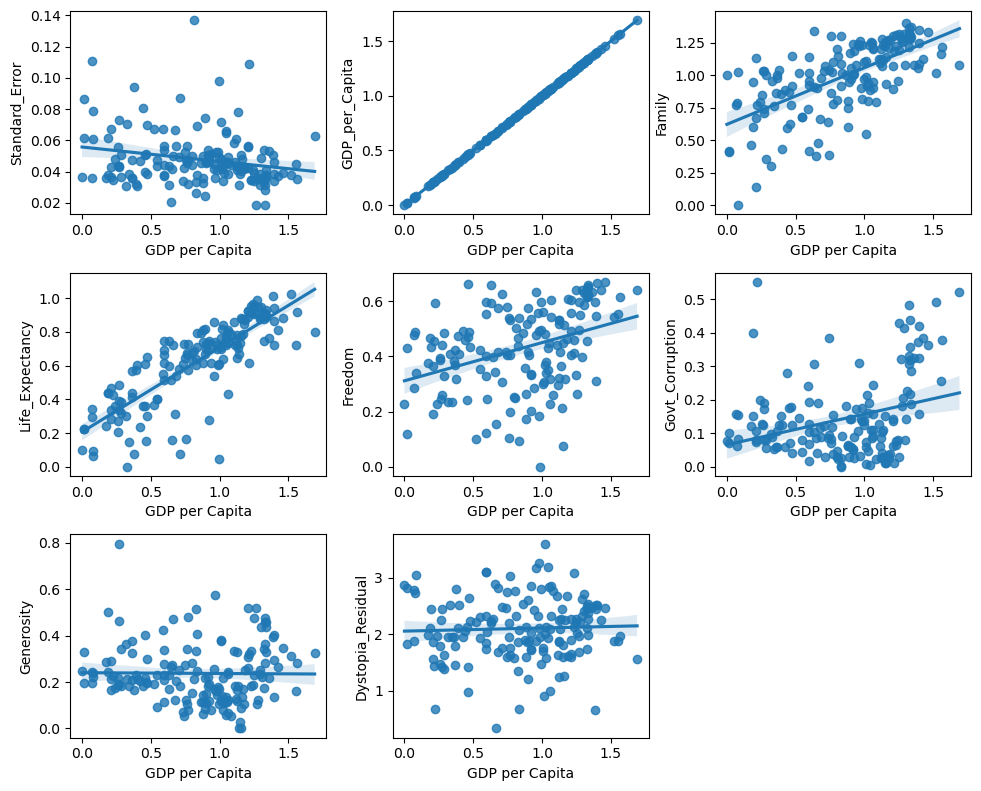

In [21]:
# Analyzing the relationship between economy and other numerical features using regression plot

plt.figure(figsize=(10,8))
index=1
for feature in num_feature:
    if feature not in ['Happiness_Score','GDP_per_Capita)'] and index<9:
        plt.subplot(3,3,index)
        sns.regplot(x=df['GDP_per_Capita'],y=df[feature])
        plt.xlabel('GDP per Capita')
        plt.ylabel(feature)
        index+=1
plt.tight_layout()    

Multiple Regression Analysis

C:\Users\Jayanta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Jayanta\AppData\Local\Temp\ipykernel_18420\1069935403.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


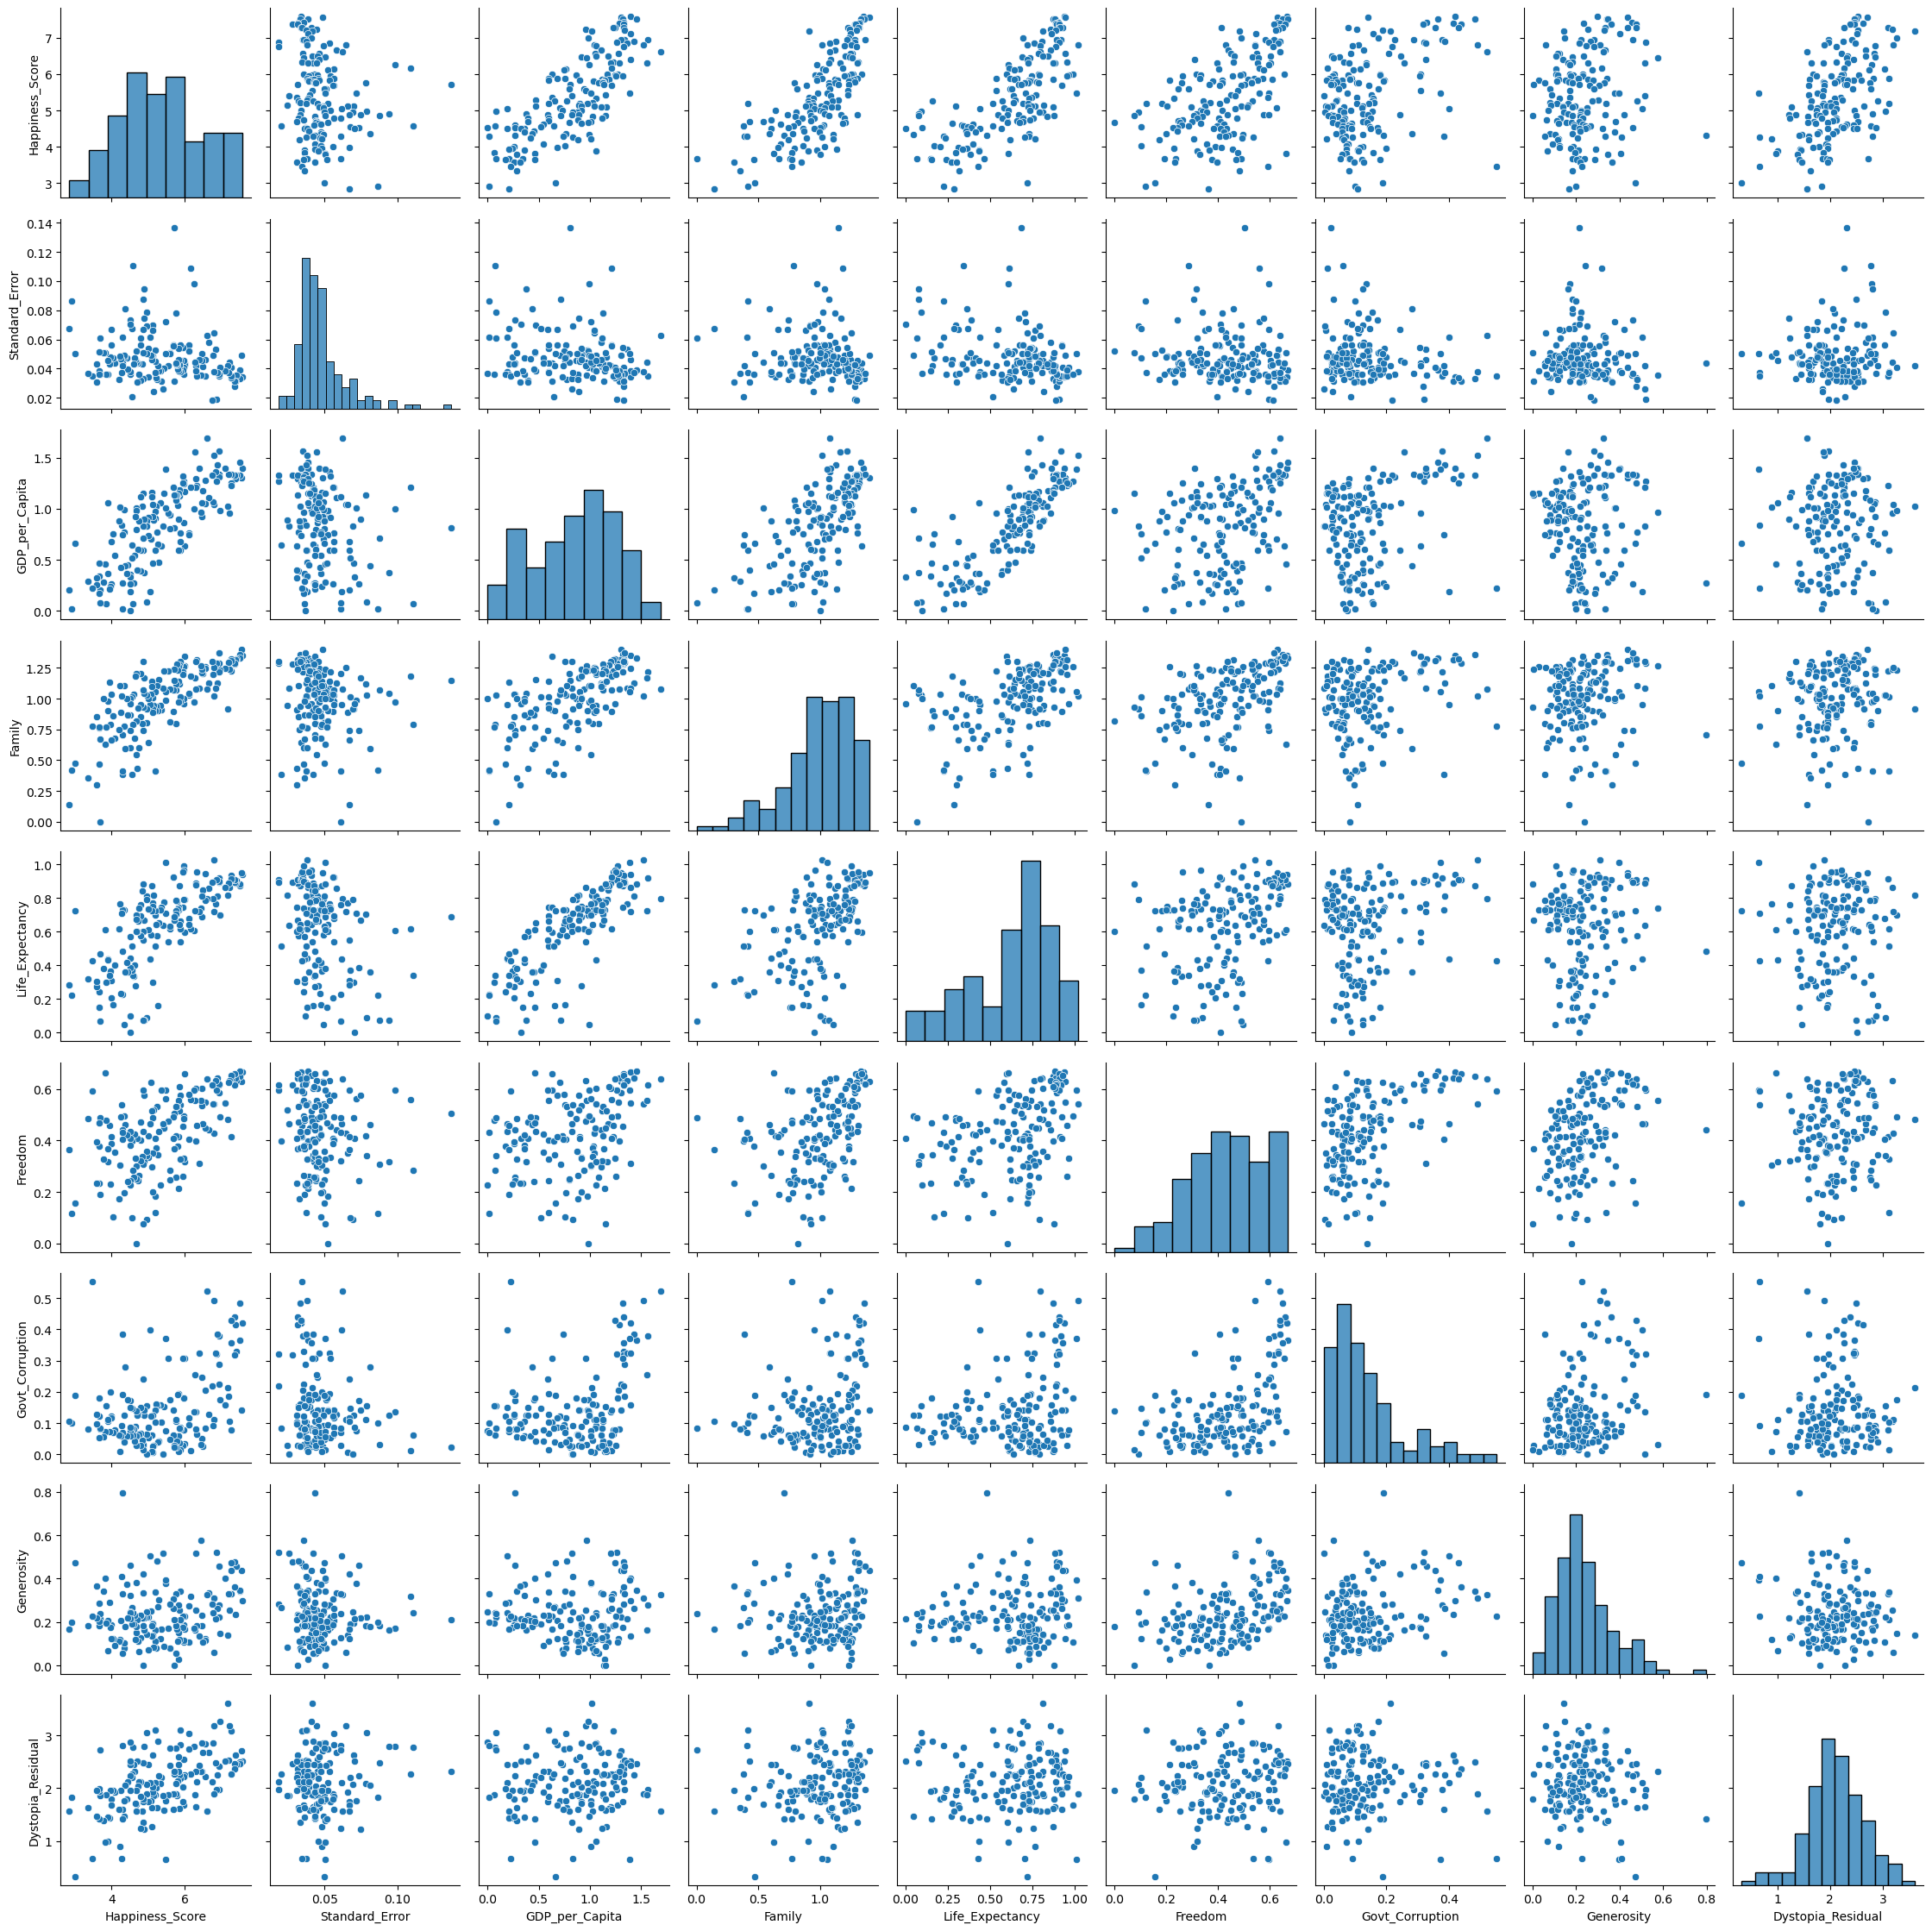

In [22]:
data=df.copy()
data.drop('Happiness Rank', axis=1, inplace=True)
sns.pairplot(data)
plt.tight_layout()

Observation

1. All numerical features shows positive correlation with 'Happiness Score' except with 'Standard Error'.
2. Happiness score and happiness rank are collinear. Hence we can drop Happiness rank in feature selection.
3. Happiness score is negatively correlated with standard error. It means higher the happiness score indicates a more reliable estimate of the true population mean happiness score.
4. Happiness score is very highly correlated with Economy, Family, Health and Freedom. 
5. GDP of a country also has a positive correlation with all features except standard error.
6. GDP plays not much role in Genorosity of a country.

# Feature Engineering

Outliers

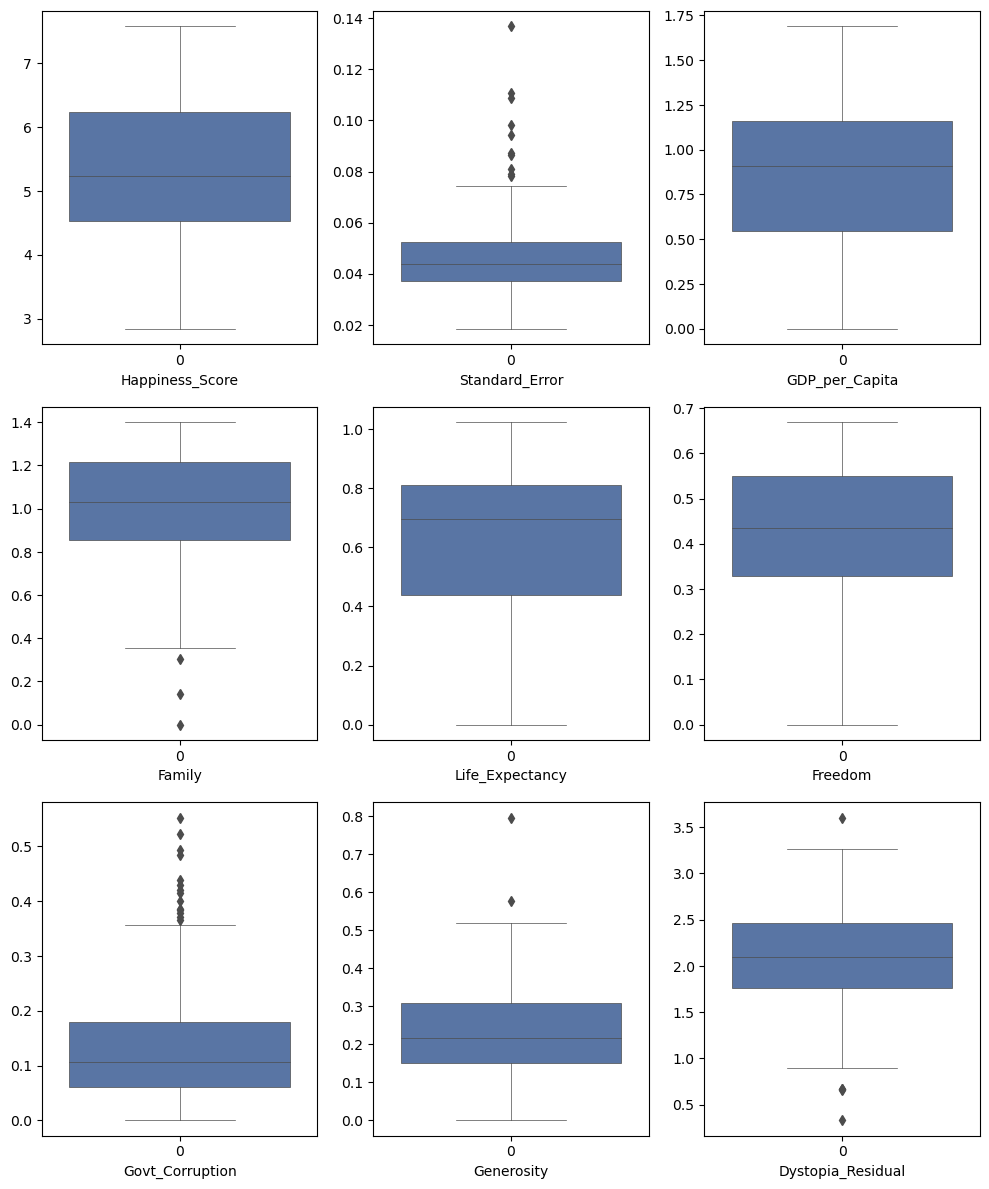

In [23]:
# Checking for the presence of outliers 
plt.figure(figsize=(10,12))
data=df.copy()
index=1
for feature in num_feature:
    if index<=9:
        plt.subplot(3,3,index)
        sns.boxplot(data=data[feature], palette='deep', linewidth=.5)
        plt.xlabel(feature)
        index+=1
plt.tight_layout()      
        

Observation

Features 'Standard Error', 'Family', 'Trust (Government Corruption)', 'Generosity' has outliers present.

In [24]:
def outliers_detection(data):
    z_score=np.abs(zscore(data[num_feature]))
    print(np.where(z_score>3))
    return z_score
    

In [25]:
z_score=outliers_detection(df)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [26]:
z_score

,Happiness_Score,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Govt_Corruption,Generosity,Dystopia_Residual
0,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
5,1.778780,0.964481,1.105190,1.205183,1.050980,1.418466,2.259005,0.029976,0.943417
6,1.754249,1.163991,1.202715,1.064891,1.066124,1.245847,1.460200,1.891021,0.664600
7,1.741983,0.954535,1.208364,1.097671,1.139329,1.539026,2.465602,0.992407,0.493323
8,1.673644,0.829329,1.005474,1.210376,1.129179,1.403088,2.388546,1.882389,0.299519
9,1.671892,0.412755,1.213018,1.171924,1.223334,1.482041,1.779705,1.570472,0.303524


In [27]:
def removing_outliers(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [28]:
data=removing_outliers(z_score,data)

In [29]:
data

,Country,Region,Happiness Rank,Happiness_Score,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Govt_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [30]:
#Calculating the total data loss
total_data_loss=df.shape[0]-data.shape[0]
print('The total data lost due to outliers is:', total_data_loss)

The total data lost due to outliers is: 9


In [31]:
#Calculating the percentage of data loss
total_data=df.shape[0]
percent=total_data_loss*100/total_data
print('Total percentage of data lost is: {:.2f}%'.format(percent))

Total percentage of data lost is: 5.70%


In [32]:
# Assigning the outlier free dataset to df
df=data

Skewness

Two categorical features namely 'Country', 'Region' are present in the dataset. Both the features plays no role in determining the Happiness score. So, both the features will be removed during feature selection process.

Hence, will not use encoding techniques for these 2 categorical variables.

In [33]:
# Checking skewness in the dataset

df[num_feature].skew()

Happiness_Score      0.169740
Standard_Error       1.243048
GDP_per_Capita      -0.390657
Family              -0.811340
Life_Expectancy     -0.747711
Freedom             -0.400867
Govt_Corruption      1.272530
Generosity           0.654710
Dystopia_Residual   -0.021144
dtype: float64

Observation

Features standard error and trust has high skewness. Whereas family, health and Generosity has mild skewness present.

In [34]:
# Removing skewness in 'Standard Error' using log transformation

df['Standard_Error']=np.log(df['Standard_Error'])

In [35]:
df[num_feature].skew()

Happiness_Score      0.169740
Standard_Error       0.123220
GDP_per_Capita      -0.390657
Family              -0.811340
Life_Expectancy     -0.747711
Freedom             -0.400867
Govt_Corruption      1.272530
Generosity           0.654710
Dystopia_Residual   -0.021144
dtype: float64

In [36]:
# Removing skewness in 'Government_Corruption' using cube root
df['Govt_Corruption']=np.cbrt(df['Govt_Corruption'])

In [37]:
df[num_feature].skew()

Happiness_Score      0.169740
Standard_Error       0.123220
GDP_per_Capita      -0.390657
Family              -0.811340
Life_Expectancy     -0.747711
Freedom             -0.400867
Govt_Corruption     -0.064568
Generosity           0.654710
Dystopia_Residual   -0.021144
dtype: float64

In [38]:
# Removing skewness in 'Family' using boxcox
skewed_family, lambda_value = boxcox(df['Family'])
data=pd.DataFrame()
data['Family']=skewed_family
data['Family'].skew()

-0.21517805498769374

In [39]:
df['Family']=skewed_family

In [40]:
df[num_feature].skew()

Happiness_Score      0.169740
Standard_Error       0.123220
GDP_per_Capita      -0.390657
Family              -0.215178
Life_Expectancy     -0.747711
Freedom             -0.400867
Govt_Corruption     -0.064568
Generosity           0.654710
Dystopia_Residual   -0.021144
dtype: float64

In [41]:
# Removing skewness in 'Generosity' using log transformation

df['Generosity']=np.log(df['Generosity']+1)

In [42]:
df[num_feature].skew()

Happiness_Score      0.169740
Standard_Error       0.123220
GDP_per_Capita      -0.390657
Family              -0.215178
Life_Expectancy     -0.747711
Freedom             -0.400867
Govt_Corruption     -0.064568
Generosity           0.433539
Dystopia_Residual   -0.021144
dtype: float64

In [43]:
# Removing skewness in 'Life_Expectancy' using boxcox 

skewed_le, lambda_value = boxcox(df['Life_Expectancy']+1)
data=pd.DataFrame()
data['Life_Expectancy']=skewed_le
data['Life_Expectancy'].skew()

-0.19066251471414533

In [44]:
df['Life_Expectancy']=skewed_le

In [45]:
df[num_feature].skew()

Happiness_Score      0.169740
Standard_Error       0.123220
GDP_per_Capita      -0.390657
Family              -0.215178
Life_Expectancy     -0.190663
Freedom             -0.400867
Govt_Corruption     -0.064568
Generosity           0.433539
Dystopia_Residual   -0.021144
dtype: float64

Observation

Applying cube root, log transformation and boxcox method, skewness has been removed from the dataset.

Correlation between features and dependent variable

In [46]:
df[num_feature].corr()

,Happiness_Score,Standard_Error,GDP_per_Capita,Family,Life_Expectancy,Freedom,Govt_Corruption,Generosity,Dystopia_Residual
Happiness_Score,1.000000,-0.238213,0.773577,0.751040,0.756464,0.585066,0.394775,0.244886,0.528334
Standard_Error,-0.238213,1.000000,-0.239185,-0.182054,-0.326375,-0.208796,-0.099985,-0.156394,0.021158
GDP_per_Capita,0.773577,-0.239185,1.000000,0.643981,0.841707,0.376780,0.231317,0.008144,0.026936
Family,0.751040,-0.182054,0.643981,1.000000,0.563802,0.515380,0.220427,0.188776,0.135993
Life_Expectancy,0.756464,-0.326375,0.841707,0.563802,1.000000,0.404945,0.192928,0.141288,0.042297
Freedom,0.585066,-0.208796,0.376780,0.515380,0.404945,1.000000,0.482062,0.430573,0.058596
Govt_Corruption,0.394775,-0.099985,0.231317,0.220427,0.192928,0.482062,1.000000,0.246160,0.107929
Generosity,0.244886,-0.156394,0.008144,0.188776,0.141288,0.430573,0.246160,1.000000,-0.029312
Dystopia_Residual,0.528334,0.021158,0.026936,0.135993,0.042297,0.058596,0.107929,-0.029312,1.000000


Visualizing correlation amoung features

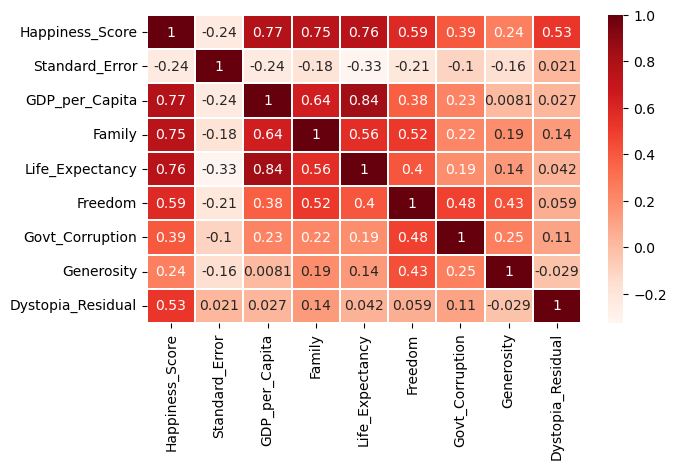

In [47]:
plt.figure(figsize=(7,4))
sns.heatmap(df[num_feature].corr(),fmt='.2g',annot=True,linewidth=.2,cmap='Reds')
plt.show()

Observations

1. All the independent features are strong to moderately positive correlated with target variable except standard error which is negatively correlated.
2. Life expentency and GDP are highly correlated.

# Feature Selection

Observation

1. The target variable Happiness Score does not depends on categorical features Country and Region. They only represents the place and region of happiness score. Hence, we can drop both the feature from the dataset.
2. Also the numerical feature Happiness Rank is nothing another term for index. Hence, we can drop Happiness Rank. 

In [48]:
# Dropping Country from dataset

df.drop('Country',axis=1,inplace=True)

In [49]:
# Dropping Region from dataset

df.drop('Region',axis=1,inplace=True)

In [50]:
# Dropping Happiness Rank from dataset
df.drop('Happiness Rank',axis=1,inplace=True)

Separating the Dependent and Independent features

In [51]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

Scaling the independent features using StandardScaler Technique

In [52]:
def scaling_stdScaler(x):
    st=StandardScaler()
    x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
    return x

In [53]:
#Calling the scaling_stdScaler function and assigning to x
x=scaling_stdScaler(x)

Standard scaling will transfor the values of the dataset into same scale. It will help in improving the model performance and ensure that the data is in the same scale.

Variance Inflation Factor

In [54]:
def vif_calc(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF Factors']=[VIF(x.values,i) for i in range(x.shape[1])]
    
    return vif

In [55]:
vif_calc(x)

,Features,VIF Factors
0,Standard_Error,1.142544
1,GDP_per_Capita,4.529624
2,Family,2.095268
3,Life_Expectancy,3.898026
4,Freedom,1.963300
5,Govt_Corruption,1.358081
6,Generosity,1.356332
7,Dystopia_Residual,1.048685


Observation

Based on the variance inflation factor (VIF) values, it seems that multicollinearity is not severe among the features in the dataset. Generally, VIF values below 5 are considered acceptable, indicating that multicollinearity is not a significant concern.


# Modeling - ML Prediction for Happiness Score

Calculating the random state and score

In [56]:
def random_state_cal(x,y):
    best_randomstate = None
    best_score = 0
    
    for rs in range(1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=rs)
        model_lr=LinearRegression()
        model_lr.fit(x_train,y_train)
        pred=model_lr.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('R2 Score :{} Random state :{}'.format(best_score,best_randomstate))

In [57]:
random_state_cal(x,y)

R2 Score :0.9980492773229644 Random state :37


Applying train_test_split with test_size=.30 and random_state=37

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=37)

In [59]:
def Linear_Regression(x_train,x_test,y_train,y_test):
    
    model_lr=LinearRegression()
    model_lr.fit(x_train,y_train)
    prediction_lr=model_lr.predict(x_test)
    prediction_y_train=model_lr.predict(x_train)
    
    r2=r2_score(y_test,prediction_lr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_lr)
    mse=mean_squared_error(y_test,prediction_lr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_lr))
    prediction_chart=pd.DataFrame({'Linear Regression':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_lr 

In [60]:
prediction_chart,prediction_lr=Linear_Regression(x_train,x_test,y_train,y_test)
prediction_chart

,Linear Regression,Scores
0,R2 Score,99.804928
1,R2 Score on Training Data,99.499695
2,Mean Absolute Error,0.044779
3,Mean Squared Error,0.002981
4,Root Mean Squared Error,0.054596


In [61]:
def lasso(x_train,x_test,y_train,y_test):
    
    model_lasso=Lasso()
    model_lasso.fit(x_train,y_train)
    prediction_las=model_lasso.predict(x_test)
    prediction_y_train=model_lasso.predict(x_train)
    
    r2=r2_score(y_test,prediction_las) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_las)
    mse=mean_squared_error(y_test,prediction_las)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_las))
    prediction_chart=pd.DataFrame({'Lasso':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_las

In [62]:
prediction_chart,prediction_las=lasso(x_train,x_test,y_train,y_test)
prediction_chart

,Lasso,Scores
0,R2 Score,-3.185401
1,R2 Score on Training Data,0.000000
2,Mean Absolute Error,1.090314
3,Mean Squared Error,1.576655
4,Root Mean Squared Error,1.255649


In [63]:
def ridge(x_train,x_test,y_train,y_test):
    
    model_ridge=Ridge()
    model_ridge.fit(x_train,y_train)
    prediction_ridge=model_ridge.predict(x_test)
    prediction_y_train=model_ridge.predict(x_train)
    
    r2=r2_score(y_test,prediction_ridge) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_ridge)
    mse=mean_squared_error(y_test,prediction_ridge)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_ridge))
    prediction_chart=pd.DataFrame({'Ridge':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_ridge

In [64]:
prediction_chart,prediction_ridge=ridge(x_train,x_test,y_train,y_test)
prediction_chart

,Ridge,Scores
0,R2 Score,99.820975
1,R2 Score on Training Data,99.494424
2,Mean Absolute Error,0.041742
3,Mean Squared Error,0.002735
4,Root Mean Squared Error,0.052302


In [65]:
def random_forest(x_train,x_test,y_train,y_test):
    
    model_ran_forest=RandomForestRegressor()
    model_ran_forest.fit(x_train,y_train)
    prediction_rf=model_ran_forest.predict(x_test)
    prediction_y_train=model_ran_forest.predict(x_train)
    
    r2=r2_score(y_test,prediction_rf) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_rf)
    mse=mean_squared_error(y_test,prediction_rf)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_rf))
    prediction_chart=pd.DataFrame({'Random Forest':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_rf

In [66]:
prediction_chart, prediction_rf=random_forest(x_train,x_test,y_train,y_test)
prediction_chart

,Random Forest,Scores
0,R2 Score,91.403037
1,R2 Score on Training Data,98.192868
2,Mean Absolute Error,0.293390
3,Mean Squared Error,0.131360
4,Root Mean Squared Error,0.362436


In [67]:
def knn(x_train,x_test,y_train,y_test):
    
    model_knn=KNN()
    model_knn.fit(x_train,y_train)
    prediction_knn=model_knn.predict(x_test)
    prediction_y_train=model_knn.predict(x_train)
    
    r2=r2_score(y_test,prediction_knn) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_knn)
    mse=mean_squared_error(y_test,prediction_knn)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_knn))
    prediction_chart=pd.DataFrame({'KNN':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_knn

In [68]:
prediction_chart,prediction_knn=knn(x_train,x_test,y_train,y_test)
prediction_chart

,KNN,Scores
0,R2 Score,91.755097
1,R2 Score on Training Data,91.802340
2,Mean Absolute Error,0.270138
3,Mean Squared Error,0.125981
4,Root Mean Squared Error,0.354938


In [69]:
def svr(x_train,x_test,y_train,y_test):
    
    model_svr=SVR()
    model_svr.fit(x_train,y_train)
    prediction_svr=model_svr.predict(x_test)
    prediction_y_train=model_svr.predict(x_train)
    
    r2=r2_score(y_test,prediction_svr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_svr)
    mse=mean_squared_error(y_test,prediction_svr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_svr))
    prediction_chart=pd.DataFrame({'SVR':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_svr

In [70]:
prediction_chart, prediction_svr=svr(x_train,x_test,y_train,y_test)
prediction_chart

,SVR,Scores
0,R2 Score,96.939010
1,R2 Score on Training Data,98.121594
2,Mean Absolute Error,0.162447
3,Mean Squared Error,0.046771
4,Root Mean Squared Error,0.216267


In [71]:
def decision_tree(x_train,x_test,y_train,y_test):
    
    model_dt=DTR()
    model_dt.fit(x_train,y_train)
    prediction_dt=model_dt.predict(x_test)
    prediction_y_train=model_dt.predict(x_train)
    
    r2=r2_score(y_test,prediction_dt) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_dt)
    mse=mean_squared_error(y_test,prediction_dt)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_dt))
    prediction_chart=pd.DataFrame({'Decision Tree':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_dt

In [72]:
prediction_chart, prediction_dt=decision_tree(x_train,x_test,y_train,y_test)
prediction_chart

,Decision Tree,Scores
0,R2 Score,78.551803
1,R2 Score on Training Data,100.000000
2,Mean Absolute Error,0.464667
3,Mean Squared Error,0.327725
4,Root Mean Squared Error,0.572472


In [73]:
def gradient_boosting(x_train,x_test,y_train,y_test):
    
    model_gbr=GradientBoostingRegressor()
    model_gbr.fit(x_train,y_train)
    prediction_gb=model_gbr.predict(x_test)
    prediction_y_train=model_gbr.predict(x_train)
    
    r2=r2_score(y_test,prediction_gb) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_gb)
    mse=mean_squared_error(y_test,prediction_gb)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_gb))
    prediction_chart=pd.DataFrame({'Gradient Boosting Regressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_gb

In [74]:
prediction_chart, prediction_gb=gradient_boosting(x_train,x_test,y_train,y_test)
prediction_chart

,Gradient Boosting Regressor,Scores
0,R2 Score,95.814763
1,R2 Score on Training Data,99.916906
2,Mean Absolute Error,0.192524
3,Mean Squared Error,0.063950
4,Root Mean Squared Error,0.252883


In [75]:
def extra_trees_regressor(x_train,x_test,y_train,y_test):
    
    model_etr=GradientBoostingRegressor()
    model_etr.fit(x_train,y_train)
    prediction_etr=model_etr.predict(x_test)
    prediction_y_train=model_etr.predict(x_train)
    
    r2=r2_score(y_test,prediction_etr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_etr)
    mse=mean_squared_error(y_test,prediction_etr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_etr))
    prediction_chart=pd.DataFrame({'Extra Trees Regressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_etr

In [76]:
prediction_chart, prediction_etr=extra_trees_regressor(x_train,x_test,y_train,y_test)
prediction_chart

,Extra Trees Regressor,Scores
0,R2 Score,96.022122
1,R2 Score on Training Data,99.916906
2,Mean Absolute Error,0.192313
3,Mean Squared Error,0.060781
4,Root Mean Squared Error,0.246539


Cross validating for all the regression models

In [77]:
def cross_validation(x,y,*args):
    
    # Cross validation for LinearRegression
    cv_score_lr= cross_val_score(LinearRegression(),x,y,cv=5, scoring='r2')
    cv_r2_score_lr=cv_score_lr.mean()
    r2_lr=r2_score(y_test,prediction_lr)
    score_diff_lr=(r2_lr-cv_r2_score_lr)
    
    # Cross validation for Lasso
    cv_score_las= cross_val_score(Lasso(),x,y,cv=5, scoring='r2')
    cv_r2_score_las=cv_score_las.mean()
    r2_las=r2_score(y_test,prediction_las)
    score_diff_las=(r2_las-cv_r2_score_las)
    
    # Cross validation for Ridge
    cv_score_ridge= cross_val_score(Ridge(),x,y,cv=5, scoring='r2')
    cv_r2_score_ridge=cv_score_ridge.mean()
    r2_ridge=r2_score(y_test,prediction_ridge)
    score_diff_ridge=(r2_ridge-cv_r2_score_ridge)
    
    # Cross validation for Random Forest
    cv_score_rf= cross_val_score(RandomForestRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_rf=cv_score_rf.mean()
    r2_rf=r2_score(y_test,prediction_rf)
    score_diff_rf=(r2_rf-cv_r2_score_rf)
    
    # Cross validation for KNN
    cv_score_knn= cross_val_score(KNN(),x,y,cv=5, scoring='r2')
    cv_r2_score_knn=cv_score_knn.mean()
    r2_knn=r2_score(y_test,prediction_knn)
    score_diff_knn=(r2_knn-cv_r2_score_knn)
    
    # Cross validation for SVR
    cv_score_svr= cross_val_score(SVR(),x,y,cv=5, scoring='r2')
    cv_r2_score_svr=cv_score_svr.mean()
    r2_svr=r2_score(y_test,prediction_svr)
    score_diff_svr=(r2_svr-cv_r2_score_svr)
    
    # Cross validation for Decision Tree
    cv_score_dt= cross_val_score(DTR(),x,y,cv=5, scoring='r2')
    cv_r2_score_dt=cv_score_dt.mean()
    r2_dt=r2_score(y_test,prediction_dt)
    score_diff_dt=(r2_dt-cv_r2_score_dt)
    
    # Cross validation for GradientBoost
    cv_score_gb= cross_val_score(GradientBoostingRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_gb=cv_score_gb.mean()
    r2_gb=r2_score(y_test,prediction_gb)
    score_diff_gb=(r2_gb-cv_r2_score_gb)
    
    # Cross validation for ExtraTreesRegressor
    cv_score_etr= cross_val_score(ExtraTreesRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_etr=cv_score_etr.mean()
    r2_etr=r2_score(y_test,prediction_etr)
    score_diff_etr=(r2_etr-cv_r2_score_etr)
    
    df=pd.DataFrame({'Regression Name':['LinearRegression',
                                        'Lasso',
                                        'Ridge',
                                        'Random Forest',
                                        'KNN',
                                        'SVR',
                                        'Decision Tree',
                                        'GradientBoost',
                                        'ExtraTreesRegressor'],
                     'Regression Score':[r2_lr,r2_las,r2_ridge,r2_rf,r2_knn,r2_svr,r2_dt,r2_gb,r2_etr],
                     'Cross Val Score':[cv_r2_score_lr,cv_r2_score_las,cv_r2_score_ridge, cv_r2_score_rf,cv_r2_score_knn,
                                        cv_r2_score_svr,cv_r2_score_dt,cv_r2_score_gb,cv_r2_score_etr],
                     'Difference': [score_diff_lr,score_diff_las,score_diff_ridge,score_diff_rf,score_diff_knn,score_diff_svr,
                                    score_diff_dt,score_diff_gb,score_diff_etr]
                    })
    return df

In [78]:
pred=[prediction_lr, prediction_las, prediction_ridge, prediction_rf, prediction_knn,prediction_svr,prediction_dt, prediction_gb, prediction_etr]

In [79]:
cross_validation(x,y,y_test, *pred)

,Regression Name,Regression Score,Cross Val Score,Difference
0,LinearRegression,0.998049,0.876526,0.121523
1,Lasso,-0.031854,-23.099532,23.067678
2,Ridge,0.998210,0.876077,0.122132
3,Random Forest,0.914030,-3.448222,4.362252
4,KNN,0.917551,-5.224183,6.141734
5,SVR,0.969390,-3.110241,4.079631
6,Decision Tree,0.785518,-7.895577,8.681095
7,GradientBoost,0.958148,-2.525010,3.483158
8,ExtraTreesRegressor,0.960221,-3.003730,3.963951


Observation

We have observed that both Linear Regression model and Ridge regression model are performing well. Both the models also have almost identical performance. 

Since, Ridge regression is the regularization method used in linear regression. Hence, Ridge regression is the best model for the dataset.

# Hypertuning using GridSearchCV

Creating dictionary of parameters list for Ridge regression 

In [80]:
parameters={'alpha':[0.01,0.1,0.2,0.5,1,2],
            'fit_intercept':[True,False],
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'random_state':[37,39,42,43,45,47]
           }

Applying GridSearchCV on the Ridge Regression model

In [81]:
gridsearch_cv=GridSearchCV(Ridge(),parameters,cv=5)
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.5, 1, 2],
                         'fit_intercept': [True, False],
                         'random_state': [37, 39, 42, 43, 45, 47],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [82]:
gridsearch_cv.best_params_

{'alpha': 0.1, 'fit_intercept': True, 'random_state': 43, 'solver': 'sag'}

# Creating the Final Model

In [83]:
final_model=Ridge(alpha= 0.1, fit_intercept= True, random_state= 43, solver= 'sag')

In [84]:
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
r2=r2_score(y_test,pred)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
rmse=np.sqrt(mean_absolute_error(y_test,pred))

prediction_chart=pd.DataFrame({'Final model (Ridge)':['R2 Score',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,mae,mse,rmse]
                                  })
prediction_chart

,Final model (Ridge),Scores
0,R2 Score,0.998073
1,Mean Absolute Error,0.044301
2,Mean Squared Error,0.002945
3,Root Mean Squared Error,0.210479


# Saving the model

Saving the model using joblib

In [85]:
import joblib

In [86]:
joblib.dump(final_model,'Happiness_Score_Prediction.pkl')

['Happiness_Score_Prediction.pkl']

Saving the model using pickle

In [87]:
import pickle

In [88]:
file='Happiness_Score_Prediction.pkl'
pickle.dump(final_model,open(file,'wb'))

Loading the file to test

In [89]:
test_model=pickle.load(open('Happiness_Score_Prediction.pkl','rb'))
predict=test_model.score(x_test,y_test)
print(predict)

0.9980729180945066


In [90]:
pd.DataFrame([test_model.predict(x_test)[:],y_test[:]],index=['Predict','Original'])

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
Predict,4.830052,4.703657,7.46355,4.806466,6.664185,5.830966,4.504904,5.707402,7.375266,4.061912,...,3.869651,3.847701,6.521691,4.669779,7.304889,7.288241,4.287404,5.150206,7.448096,3.915982
Original,4.949000,4.786000,7.52700,4.800000,6.575000,5.890000,4.550000,5.759000,7.406000,4.077000,...,3.896000,3.904000,6.505000,4.565000,7.284000,7.200000,4.297000,5.192000,7.427000,3.931000
